In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


Country  isDeveloped  Lifeexpectancy  AdultMortality  \
0        Afghanistan          0.0        58.19375        269.0625   
1            Albania          0.0        75.15625         45.0625   
2            Algeria          0.0        73.61875        108.1875   
3             Angola          0.0        49.01875        328.5625   
4  AntiguaandBarbuda          0.0        75.05625        127.5000   

   infantdeaths   Alcohol  HepatitisB    Measles       BMI  under-fivedeaths  \
0       78.2500  0.014375   64.562500  2362.2500  15.51875          107.5625   
1        0.6875  4.848750   98.000000    53.3750  49.06875            0.9375   
2       20.3125  0.406667   78.000000  1943.8750  48.74375           23.5000   
3       83.7500  5.740667   70.222222  3561.3125  18.01875          132.6250   
4        0.0000  7.949333   98.266667     0.0000  38.42500            0.0000   

     Polio  Diphtheria           GDP    Population  Schooling  
0  48.3750     52.3125  4.136734e+09  9.972260e+06    8.21250  
1  98.1250     98.0625  1.166938e+09  6.969116e+05   12.13750  
2  91.7500     91.8750  7.345597e+10  2.164983e+07   12.71250  
3  46.1250     47.6875  2.177835e+10  1.014710e+07    8.04375  
4  96.9375     98.3125  0.000000e+00           NaN    8.84375

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
GDPpC=dfLE['GDP']/dfLE['Population']
dfLE['GDPperCapita']=GDPpC
dfLE.dropna()
dfLE.head(10)

Country  isDeveloped  Lifeexpectancy  AdultMortality  \
0        Afghanistan          0.0        58.19375        269.0625   
1            Albania          0.0        75.15625         45.0625   
2            Algeria          0.0        73.61875        108.1875   
3             Angola          0.0        49.01875        328.5625   
4  AntiguaandBarbuda          0.0        75.05625        127.5000   
5          Argentina          0.0        75.15625        106.0000   
6            Armenia          0.0        73.40000        117.3750   
7          Australia          1.0        81.81250         63.1875   
8            Austria          1.0        81.48125         65.7500   
9         Azerbaijan          0.0        70.73125        115.1875   

   infantdeaths    Alcohol  HepatitisB    Measles       BMI  under-fivedeaths  \
0       78.2500   0.014375   64.562500  2362.2500  15.51875          107.5625   
1        0.6875   4.848750   98.000000    53.3750  49.06875            0.9375   
2       20.3125   0.406667   78.000000  1943.8750  48.74375           23.5000   
3       83.7500   5.740667   70.222222  3561.3125  18.01875          132.6250   
4        0.0000   7.949333   98.266667     0.0000  38.42500            0.0000   
5       10.1250   7.966667   81.285714     2.0000  54.98125           11.3750   
6        1.0000   3.702667   87.562500   274.2500  44.70625            1.0000   
7        1.0000  10.155333   93.400000   103.9375  55.86250            1.3750   
8        0.0000  12.236000   81.062500    77.2500  48.28750            0.0000   
9        6.0625   0.992000   59.214286   598.1875  43.84375            7.1875   

     Polio  Diphtheria           GDP    Population  Schooling  GDPperCapita  
0  48.3750     52.3125  4.136734e+09  9.972260e+06    8.21250    414.824126  
1  98.1250     98.0625  1.166938e+09  6.969116e+05   12.13750   1674.441147  
2  91.7500     91.8750  7.345597e+10  2.164983e+07   12.71250   3392.912329  
3  46.1250     47.6875  2.177835e+10  1.014710e+07    8.04375   2146.263722  
4  96.9375     98.3125  0.000000e+00           NaN    8.84375           NaN  
5  93.3750     92.3750  1.641579e+11  2.012120e+07   16.50625   8158.454561  
6  89.1250     87.3750  2.901137e+09  1.015165e+06   11.78750   2857.799550  
7  86.7500     86.8750  2.905302e+11  4.587010e+06   20.03750  63337.610450  
8  86.0000     86.7500  2.259544e+11  6.474880e+06   15.38750  34897.075919  
9  75.8125     82.3125  6.669684e+09  2.157370e+06   11.35000   3091.580405

In [4]:
del dfLE['Country']

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='GDPperCapita', ylabel='Density'>

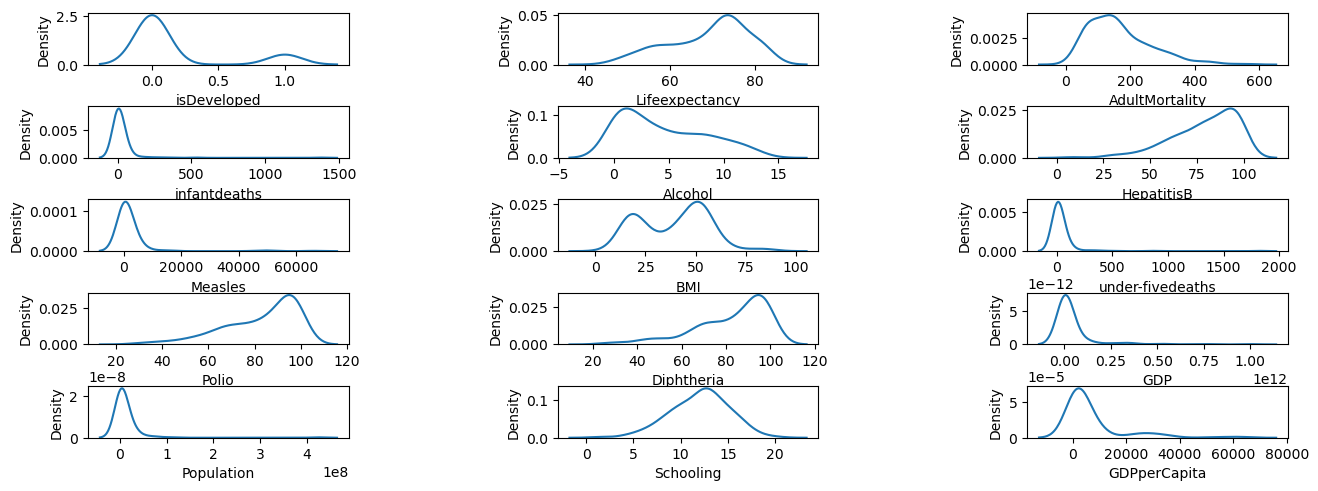

In [5]:
#Print density
fig,ax=plt.subplots(5,3)
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.8)
sns.distplot(dfLE['isDeveloped'],hist=False,kde=True,ax=ax[0,0])
sns.distplot(dfLE['Lifeexpectancy'],hist=False,kde=True,ax=ax[0,1])
sns.distplot(dfLE['AdultMortality'],hist=False,kde=True,ax=ax[0,2])
sns.distplot(dfLE['infantdeaths'],hist=False,kde=True,ax=ax[1,0])
sns.distplot(dfLE['Alcohol'],hist=False,kde=True,ax=ax[1,1])
sns.distplot(dfLE['HepatitisB'],hist=False,kde=True,ax=ax[1,2])
sns.distplot(dfLE['Measles'],hist=False,kde=True,ax=ax[2,0])
sns.distplot(dfLE['BMI'],hist=False,kde=True,ax=ax[2,1])
sns.distplot(dfLE['under-fivedeaths'],hist=False,kde=True,ax=ax[2,2])
sns.distplot(dfLE['Polio'],hist=False,kde=True,ax=ax[3,0])
sns.distplot(dfLE['Diphtheria'],hist=False,kde=True,ax=ax[3,1])
sns.distplot(dfLE['GDP'],hist=False,kde=True,ax=ax[3,2])
sns.distplot(dfLE['Population'],hist=False,kde=True,ax=ax[4,0])
sns.distplot(dfLE['Schooling'],hist=False,kde=True,ax=ax[4,1])
sns.distplot(dfLE['GDPperCapita'],hist=False,kde=True,ax=ax[4,2])

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='GDPperCapita', ylabel='Density'>

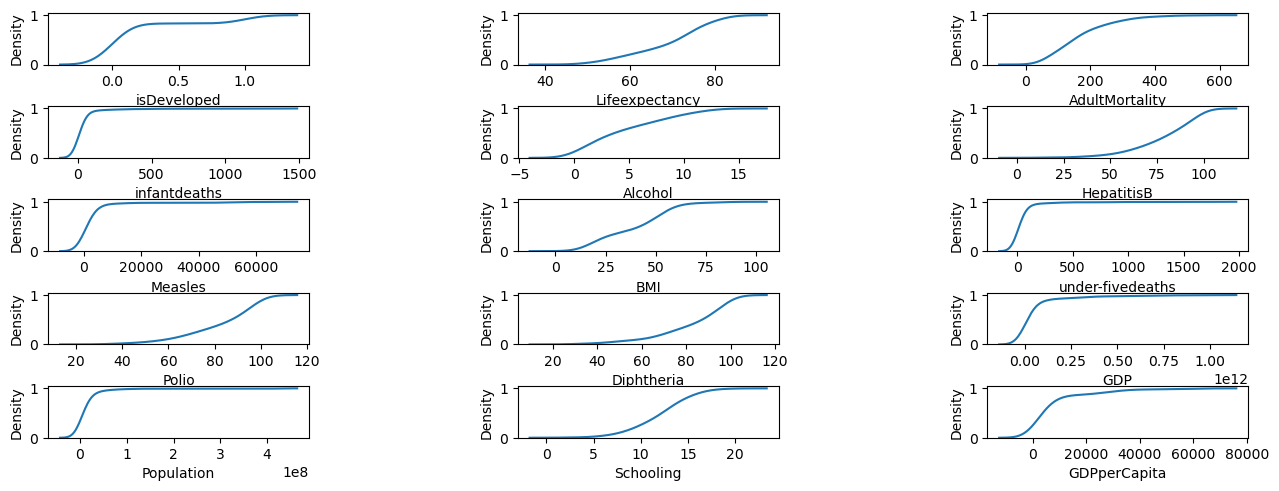

In [6]:
#Cumulative
fig,ax=plt.subplots(5,3)
plt.subplots_adjust(left=0.1,
                    bottom=0.05,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.8)
kwargs={'cumulative':True}
sns.distplot(dfLE['isDeveloped'],hist=False,kde_kws=kwargs,ax=ax[0,0])
sns.distplot(dfLE['Lifeexpectancy'],hist=False,kde_kws=kwargs,ax=ax[0,1])
sns.distplot(dfLE['AdultMortality'],hist=False,kde_kws=kwargs,ax=ax[0,2])
sns.distplot(dfLE['infantdeaths'],hist=False,kde_kws=kwargs,ax=ax[1,0])
sns.distplot(dfLE['Alcohol'],hist=False,kde_kws=kwargs,ax=ax[1,1])
sns.distplot(dfLE['HepatitisB'],hist=False,kde_kws=kwargs,ax=ax[1,2])
sns.distplot(dfLE['Measles'],hist=False,kde_kws=kwargs,ax=ax[2,0])
sns.distplot(dfLE['BMI'],hist=False,kde_kws=kwargs,ax=ax[2,1])
sns.distplot(dfLE['under-fivedeaths'],hist=False,kde_kws=kwargs,ax=ax[2,2])
sns.distplot(dfLE['Polio'],hist=False,kde_kws=kwargs,ax=ax[3,0])
sns.distplot(dfLE['Diphtheria'],hist=False,kde_kws=kwargs,ax=ax[3,1])
sns.distplot(dfLE['GDP'],hist=False,kde_kws=kwargs,ax=ax[3,2])
sns.distplot(dfLE['Population'],hist=False,kde_kws=kwargs,ax=ax[4,0])
sns.distplot(dfLE['Schooling'],hist=False,kde_kws=kwargs,ax=ax[4,1])
sns.distplot(dfLE['GDPperCapita'],hist=False,kde_kws=kwargs,ax=ax[4,2])

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

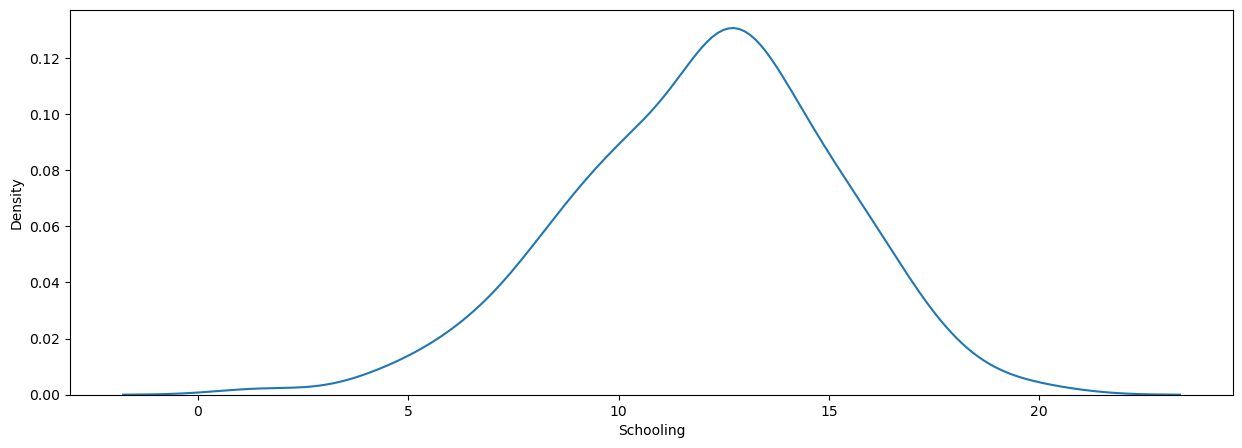

In [7]:
#Emperical for Schooling
sns.distplot(dfLE['Schooling'],hist=False,kde=True)

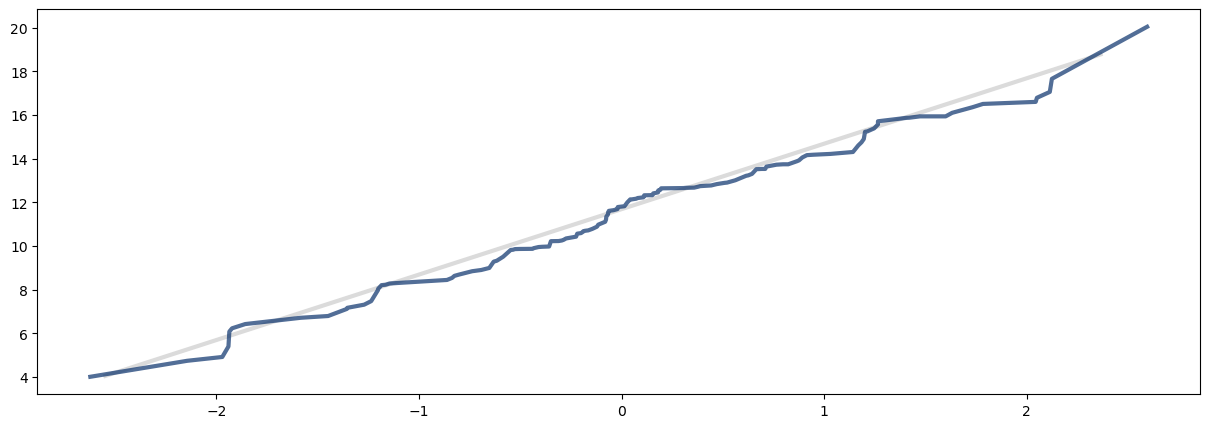

In [45]:
thinkplot.clf
thinkstats2.NormalProbabilityPlot(dfLE['Schooling'])

In [9]:
#Make analytical dist
import scipy


mu1=dfLE['Schooling'].mean()
sigma1=dfLE['Schooling'].std()
anaschooling=scipy.stats.norm(mu1,sigma1)

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

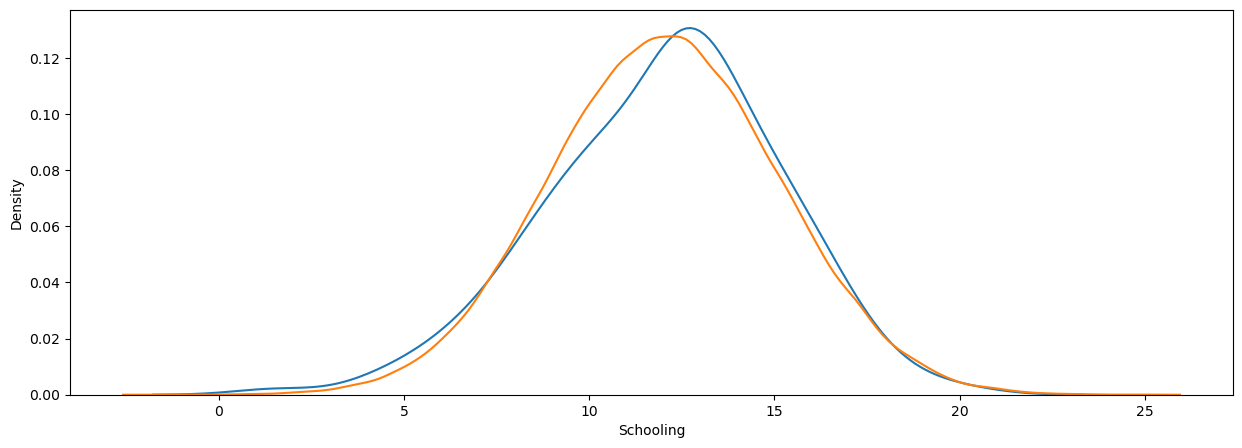

In [10]:
sns.distplot(dfLE['Schooling'],hist=False,kde=True)
data = scipy.stats.norm.rvs(size=100000, loc=mu1, scale=sigma1, random_state=123)
sns.distplot(data,hist=False,kde=True)

In [11]:
#Prediction
data_cdf=thinkstats2.Cdf(data)
data_cdf.Prob(1)

0.00021

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

## I think the GDP per Capita can be divided into two parts
first part is GDP per Capita between 0 and 12500
second part is GDP per Capita between 12500 and 60000

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDPperCapita', ylabel='Density'>

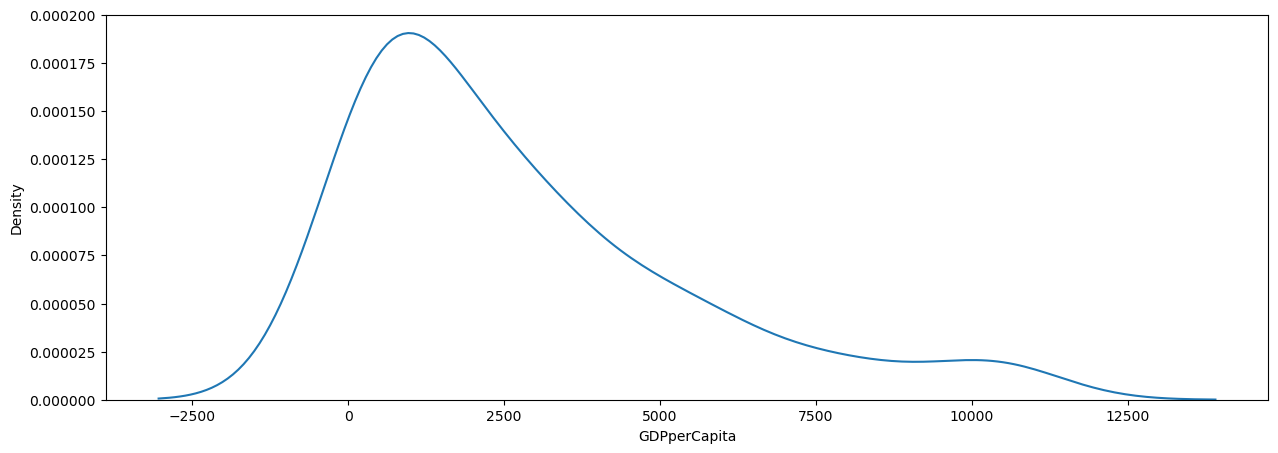

In [12]:
data1=dfLE[dfLE['GDPperCapita'].between(0,12500)]
data1=data1.dropna()
sns.distplot(data1['GDPperCapita'],hist=False,kde=True)

c:\Users\yuwei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDPperCapita', ylabel='Density'>

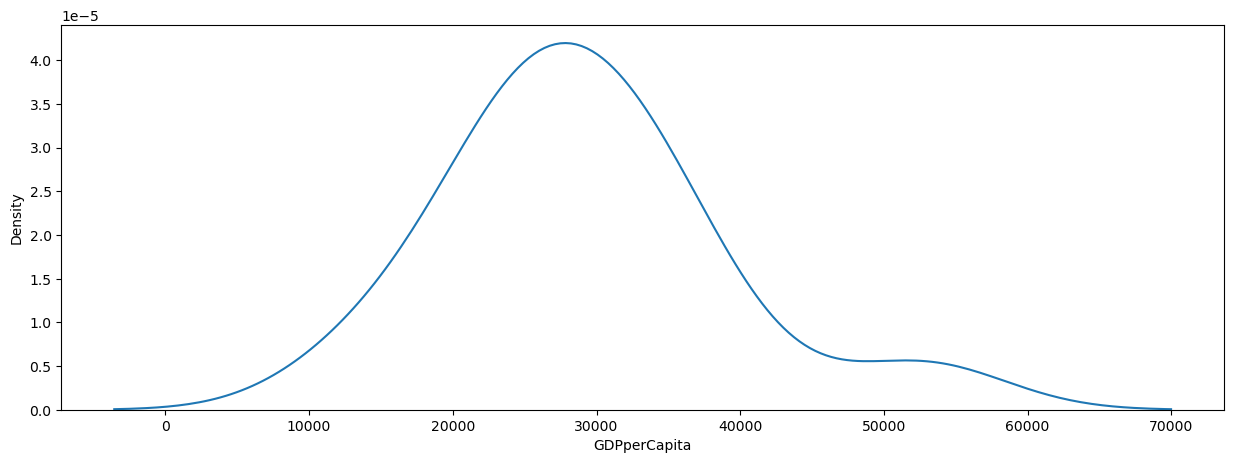

In [13]:
data2=dfLE[dfLE['GDPperCapita'].between(12500,60000)]
data2=data2.dropna()
sns.distplot(data2['GDPperCapita'],hist=False,kde=True)

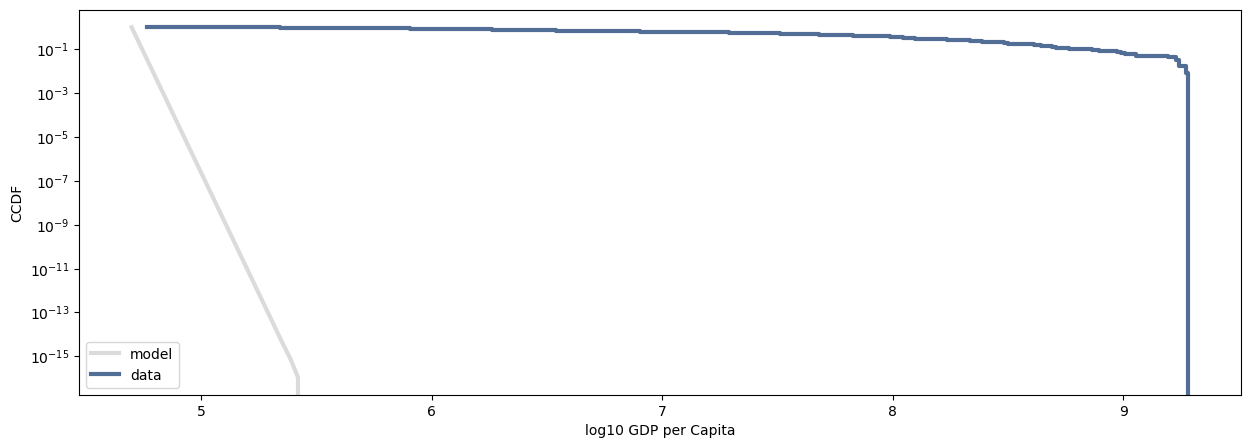

In [14]:
# Compare to pareto for part 1
logdata=np.log(data1['GDPperCapita'])
cdf_log=thinkstats2.Cdf(logdata)
xs, ys = thinkstats2.RenderParetoCdf(alpha=22, low=9, high=1e6, xmin=50000)
thinkplot.Plot(np.log10(xs), 1-ys, label="model", color=".8")
thinkplot.Cdf(cdf_log,complement=True,label='data')
thinkplot.config(xlabel='log10 GDP per Capita', ylabel='CCDF',yscale='log')


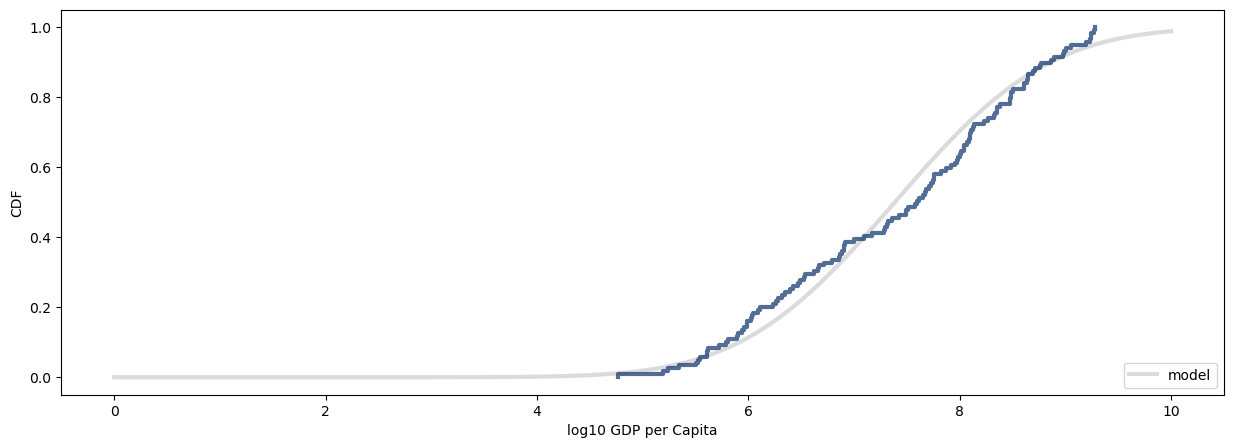

In [15]:
mu, sigma=logdata.mean(),logdata.std()
xs,ps=thinkstats2.RenderNormalCdf(mu,sigma,low=0,high=10)
thinkplot.plot(xs,ps,label='model',color='0.8')
thinkplot.Cdf(cdf_log)
thinkplot.config(xlabel='log10 GDP per Capita',ylabel='CDF', loc='lower right')

Looks like Lognormal is more appropriate for the first part

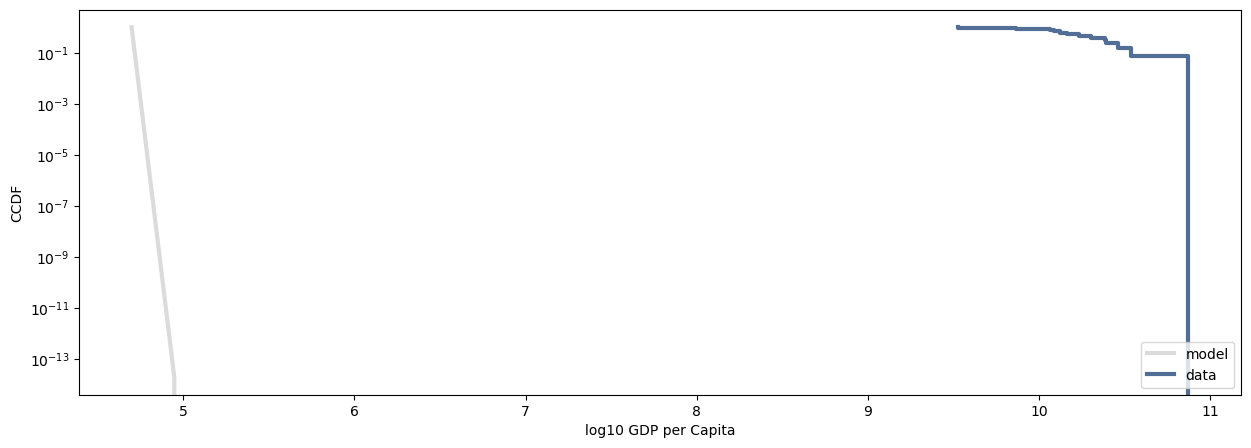

In [16]:
# Compare to pareto for part 2
logdata1=np.log(data2['GDPperCapita'])
cdf_log1=thinkstats2.Cdf(logdata1)
xs, ys = thinkstats2.RenderParetoCdf(alpha=55, low=9, high=1e6, xmin=50000)
thinkplot.Plot(np.log10(xs), 1-ys, label="model", color=".8")
thinkplot.Cdf(cdf_log1,complement=True,label='data')
thinkplot.config(xlabel='log10 GDP per Capita', ylabel='CCDF',yscale='log')

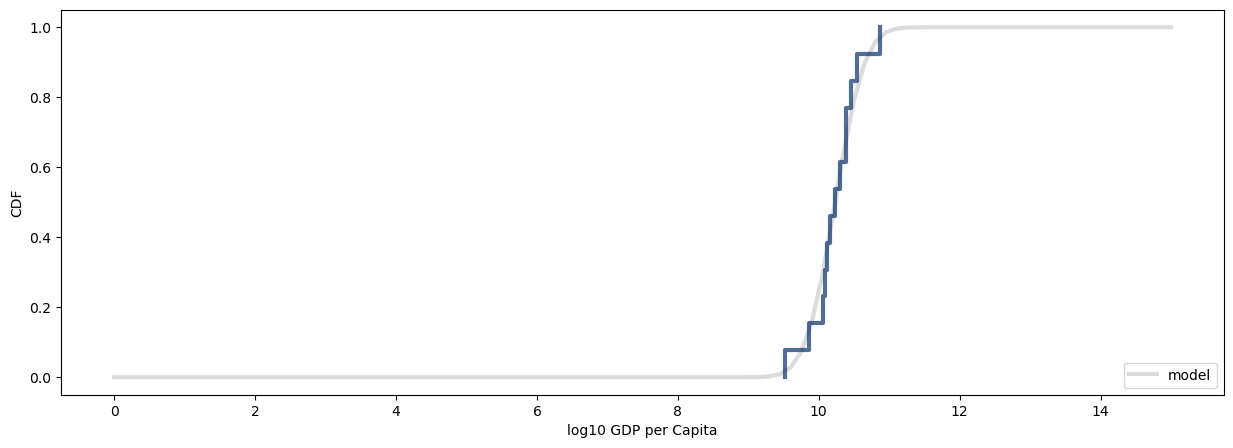

In [17]:
mu1, sigma1=logdata1.mean(),logdata1.std()
xs,ps=thinkstats2.RenderNormalCdf(mu1,sigma1,low=0,high=15)
thinkplot.plot(xs,ps,label='model',color='0.8')
thinkplot.Cdf(cdf_log1)
thinkplot.config(xlabel='log10 GDP per Capita',ylabel='CDF', loc='lower right')

### Looks like Lognormal is more appropriate for the second part as well

### Overall for both part the log normal only partly fit the empricial data, and the model will be not accurate to use in the extreme high or low region. 

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [18]:
#Visualize correlations. 
dfLE=dfLE.dropna()
dfLE.head()

isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths   Alcohol  \
0          0.0        58.19375        269.0625       78.2500  0.014375   
1          0.0        75.15625         45.0625        0.6875  4.848750   
2          0.0        73.61875        108.1875       20.3125  0.406667   
3          0.0        49.01875        328.5625       83.7500  5.740667   
5          0.0        75.15625        106.0000       10.1250  7.966667   

   HepatitisB    Measles       BMI  under-fivedeaths   Polio  Diphtheria  \
0   64.562500  2362.2500  15.51875          107.5625  48.375     52.3125   
1   98.000000    53.3750  49.06875            0.9375  98.125     98.0625   
2   78.000000  1943.8750  48.74375           23.5000  91.750     91.8750   
3   70.222222  3561.3125  18.01875          132.6250  46.125     47.6875   
5   81.285714     2.0000  54.98125           11.3750  93.375     92.3750   

            GDP    Population  Schooling  GDPperCapita  
0  4.136734e+09  9.972260e+06    8.21250    414.824126  
1  1.166938e+09  6.969116e+05   12.13750   1674.441147  
2  7.345597e+10  2.164983e+07   12.71250   3392.912329  
3  2.177835e+10  1.014710e+07    8.04375   2146.263722  
5  1.641579e+11  2.012120e+07   16.50625   8158.454561

In [19]:
dfLE.isnull().sum()

isDeveloped         0
Lifeexpectancy      0
AdultMortality      0
infantdeaths        0
Alcohol             0
HepatitisB          0
Measles             0
BMI                 0
under-fivedeaths    0
Polio               0
Diphtheria          0
GDP                 0
Population          0
Schooling           0
GDPperCapita        0
dtype: int64

### It is not resonable to have negative value in the data so here we need to remove the rows that has negative value

In [20]:
dfLE1=dfLE[dfLE>0]
dfLE1.head()

isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths   Alcohol  \
0          NaN        58.19375        269.0625       78.2500  0.014375   
1          NaN        75.15625         45.0625        0.6875  4.848750   
2          NaN        73.61875        108.1875       20.3125  0.406667   
3          NaN        49.01875        328.5625       83.7500  5.740667   
5          NaN        75.15625        106.0000       10.1250  7.966667   

   HepatitisB    Measles       BMI  under-fivedeaths   Polio  Diphtheria  \
0   64.562500  2362.2500  15.51875          107.5625  48.375     52.3125   
1   98.000000    53.3750  49.06875            0.9375  98.125     98.0625   
2   78.000000  1943.8750  48.74375           23.5000  91.750     91.8750   
3   70.222222  3561.3125  18.01875          132.6250  46.125     47.6875   
5   81.285714     2.0000  54.98125           11.3750  93.375     92.3750   

            GDP    Population  Schooling  GDPperCapita  
0  4.136734e+09  9.972260e+06    8.21250    414.824126  
1  1.166938e+09  6.969116e+05   12.13750   1674.441147  
2  7.345597e+10  2.164983e+07   12.71250   3392.912329  
3  2.177835e+10  1.014710e+07    8.04375   2146.263722  
5  1.641579e+11  2.012120e+07   16.50625   8158.454561

In [21]:
del dfLE1['isDeveloped']
dfLE1.head()

Lifeexpectancy  AdultMortality  infantdeaths   Alcohol  HepatitisB  \
0        58.19375        269.0625       78.2500  0.014375   64.562500   
1        75.15625         45.0625        0.6875  4.848750   98.000000   
2        73.61875        108.1875       20.3125  0.406667   78.000000   
3        49.01875        328.5625       83.7500  5.740667   70.222222   
5        75.15625        106.0000       10.1250  7.966667   81.285714   

     Measles       BMI  under-fivedeaths   Polio  Diphtheria           GDP  \
0  2362.2500  15.51875          107.5625  48.375     52.3125  4.136734e+09   
1    53.3750  49.06875            0.9375  98.125     98.0625  1.166938e+09   
2  1943.8750  48.74375           23.5000  91.750     91.8750  7.345597e+10   
3  3561.3125  18.01875          132.6250  46.125     47.6875  2.177835e+10   
5     2.0000  54.98125           11.3750  93.375     92.3750  1.641579e+11   

     Population  Schooling  GDPperCapita  
0  9.972260e+06    8.21250    414.824126  
1  6.969116e+05   12.13750   1674.441147  
2  2.164983e+07   12.71250   3392.912329  
3  1.014710e+07    8.04375   2146.263722  
5  2.012120e+07   16.50625   8158.454561

## isDeveloped column is either 1 or 0, so it won't be helpful for this analysis

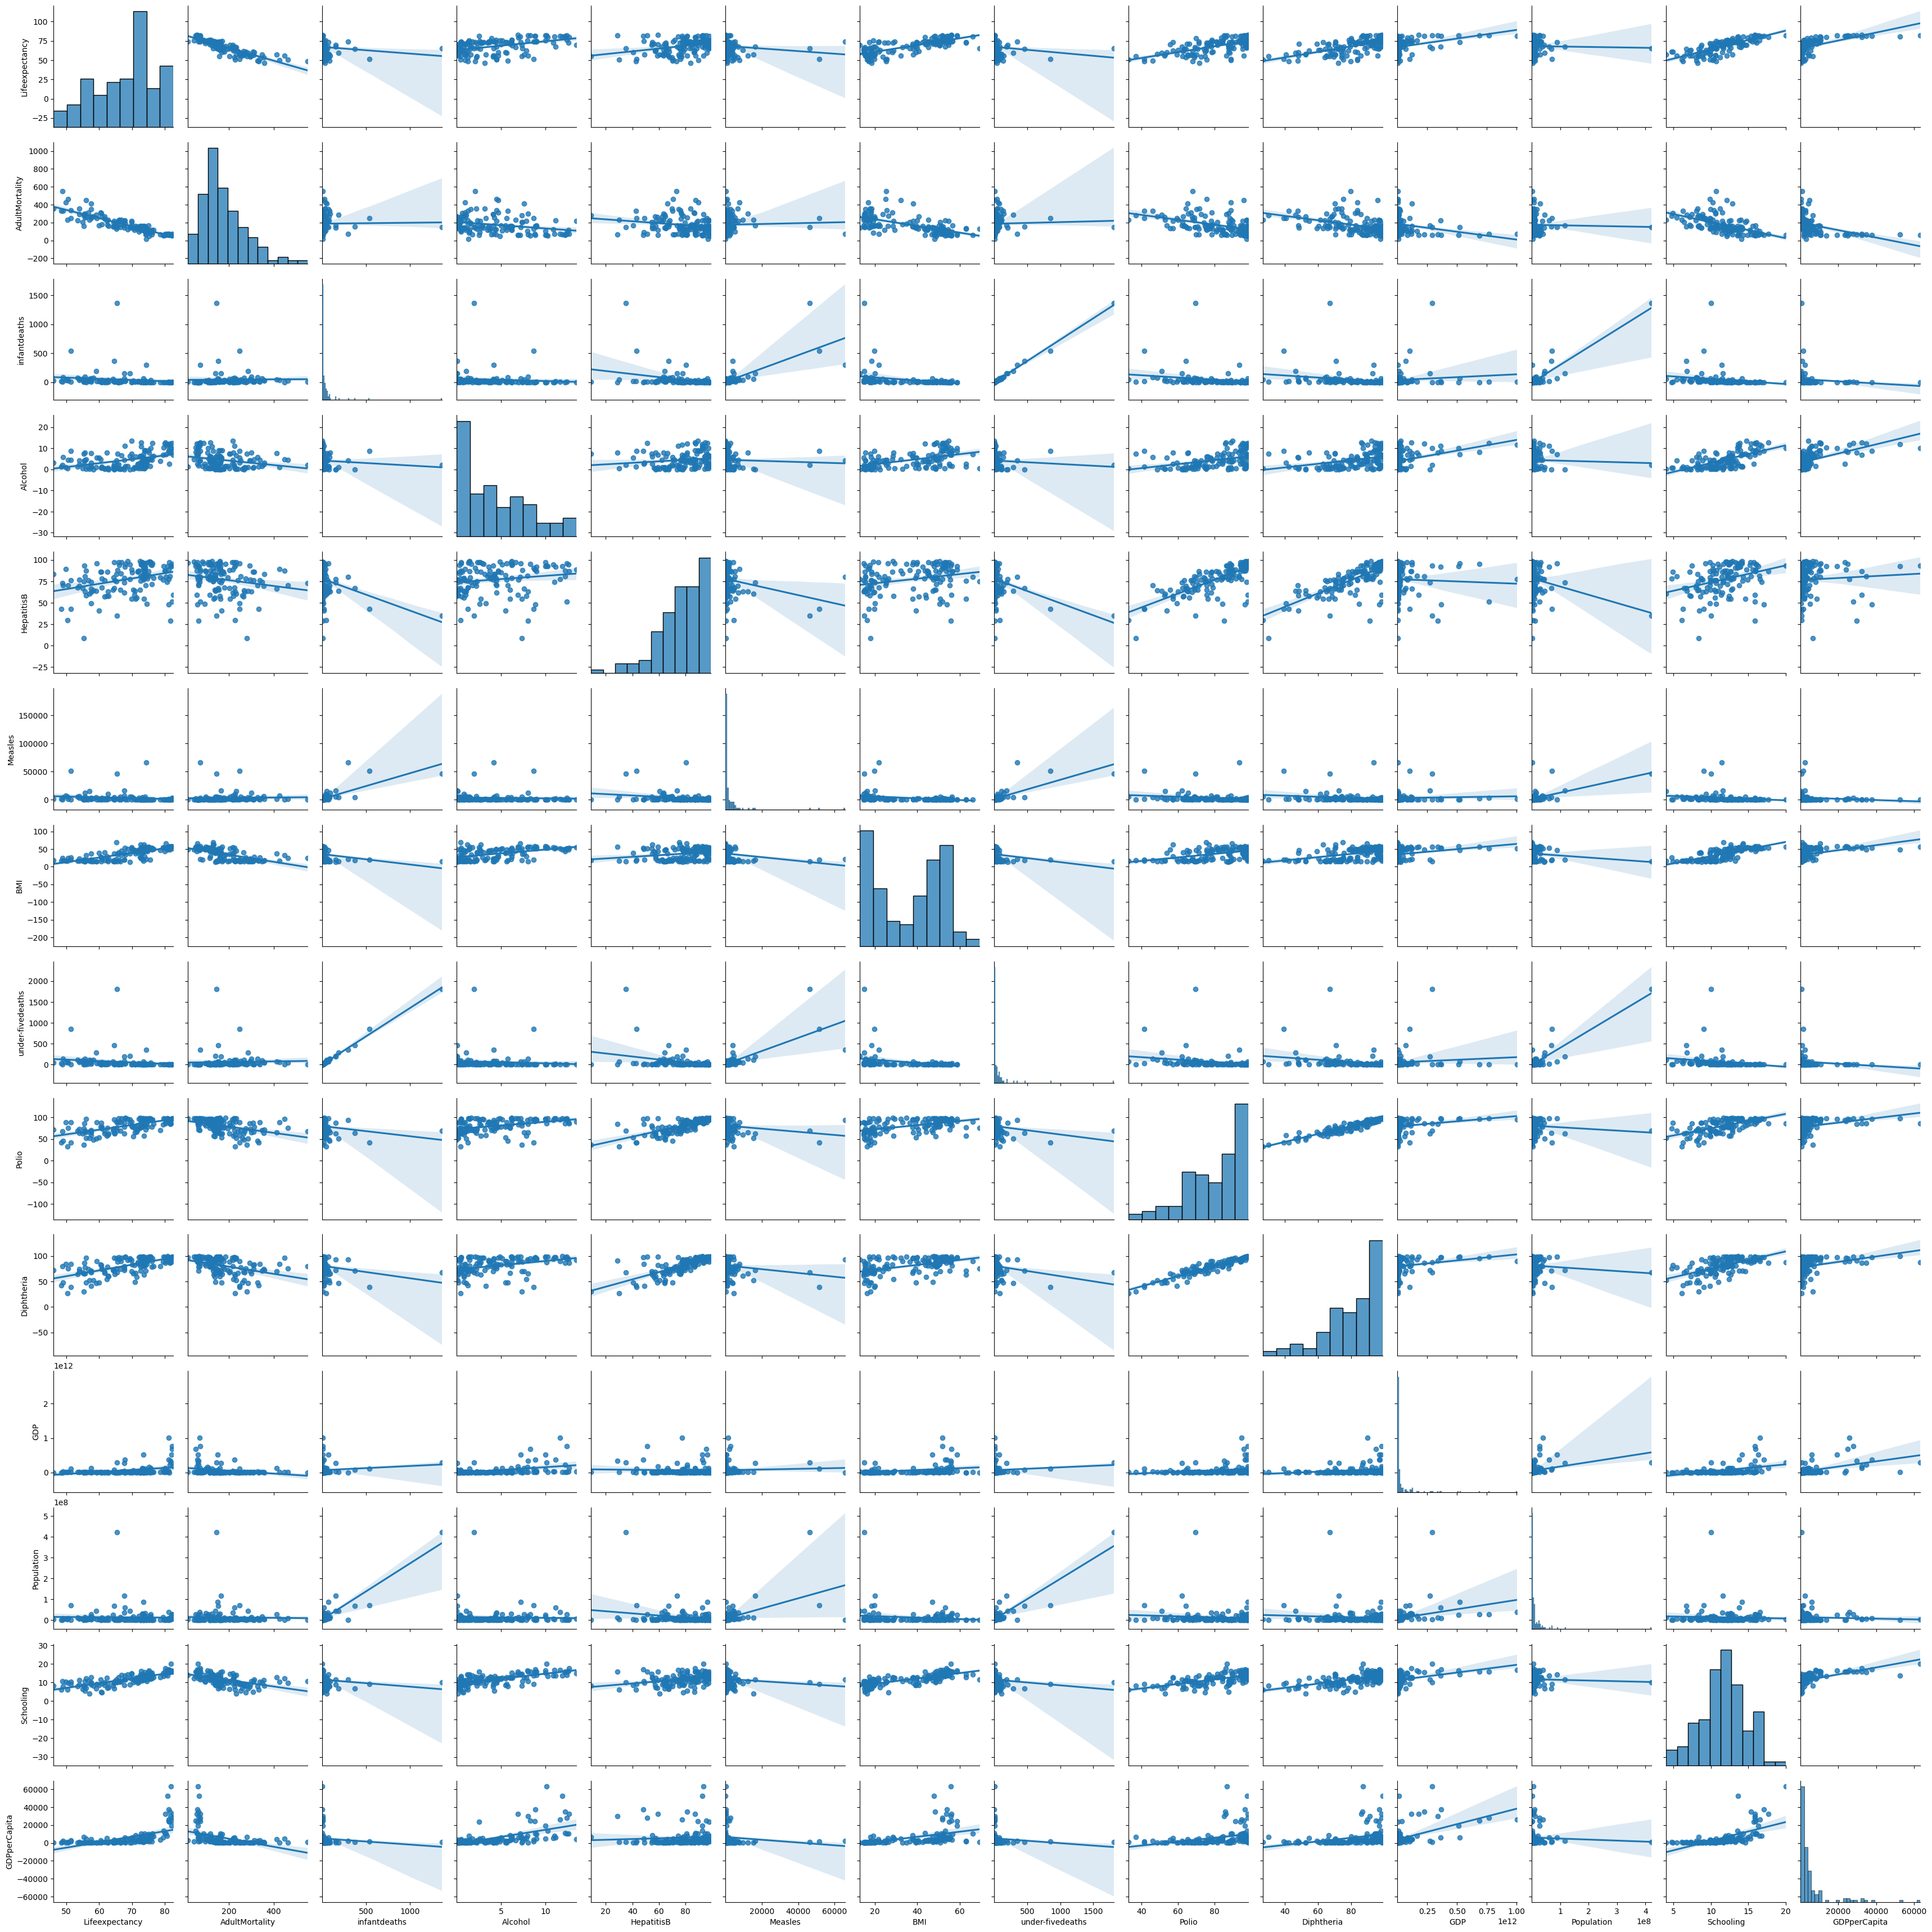

In [22]:
sns.pairplot(dfLE1,dropna=True, kind='reg')
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

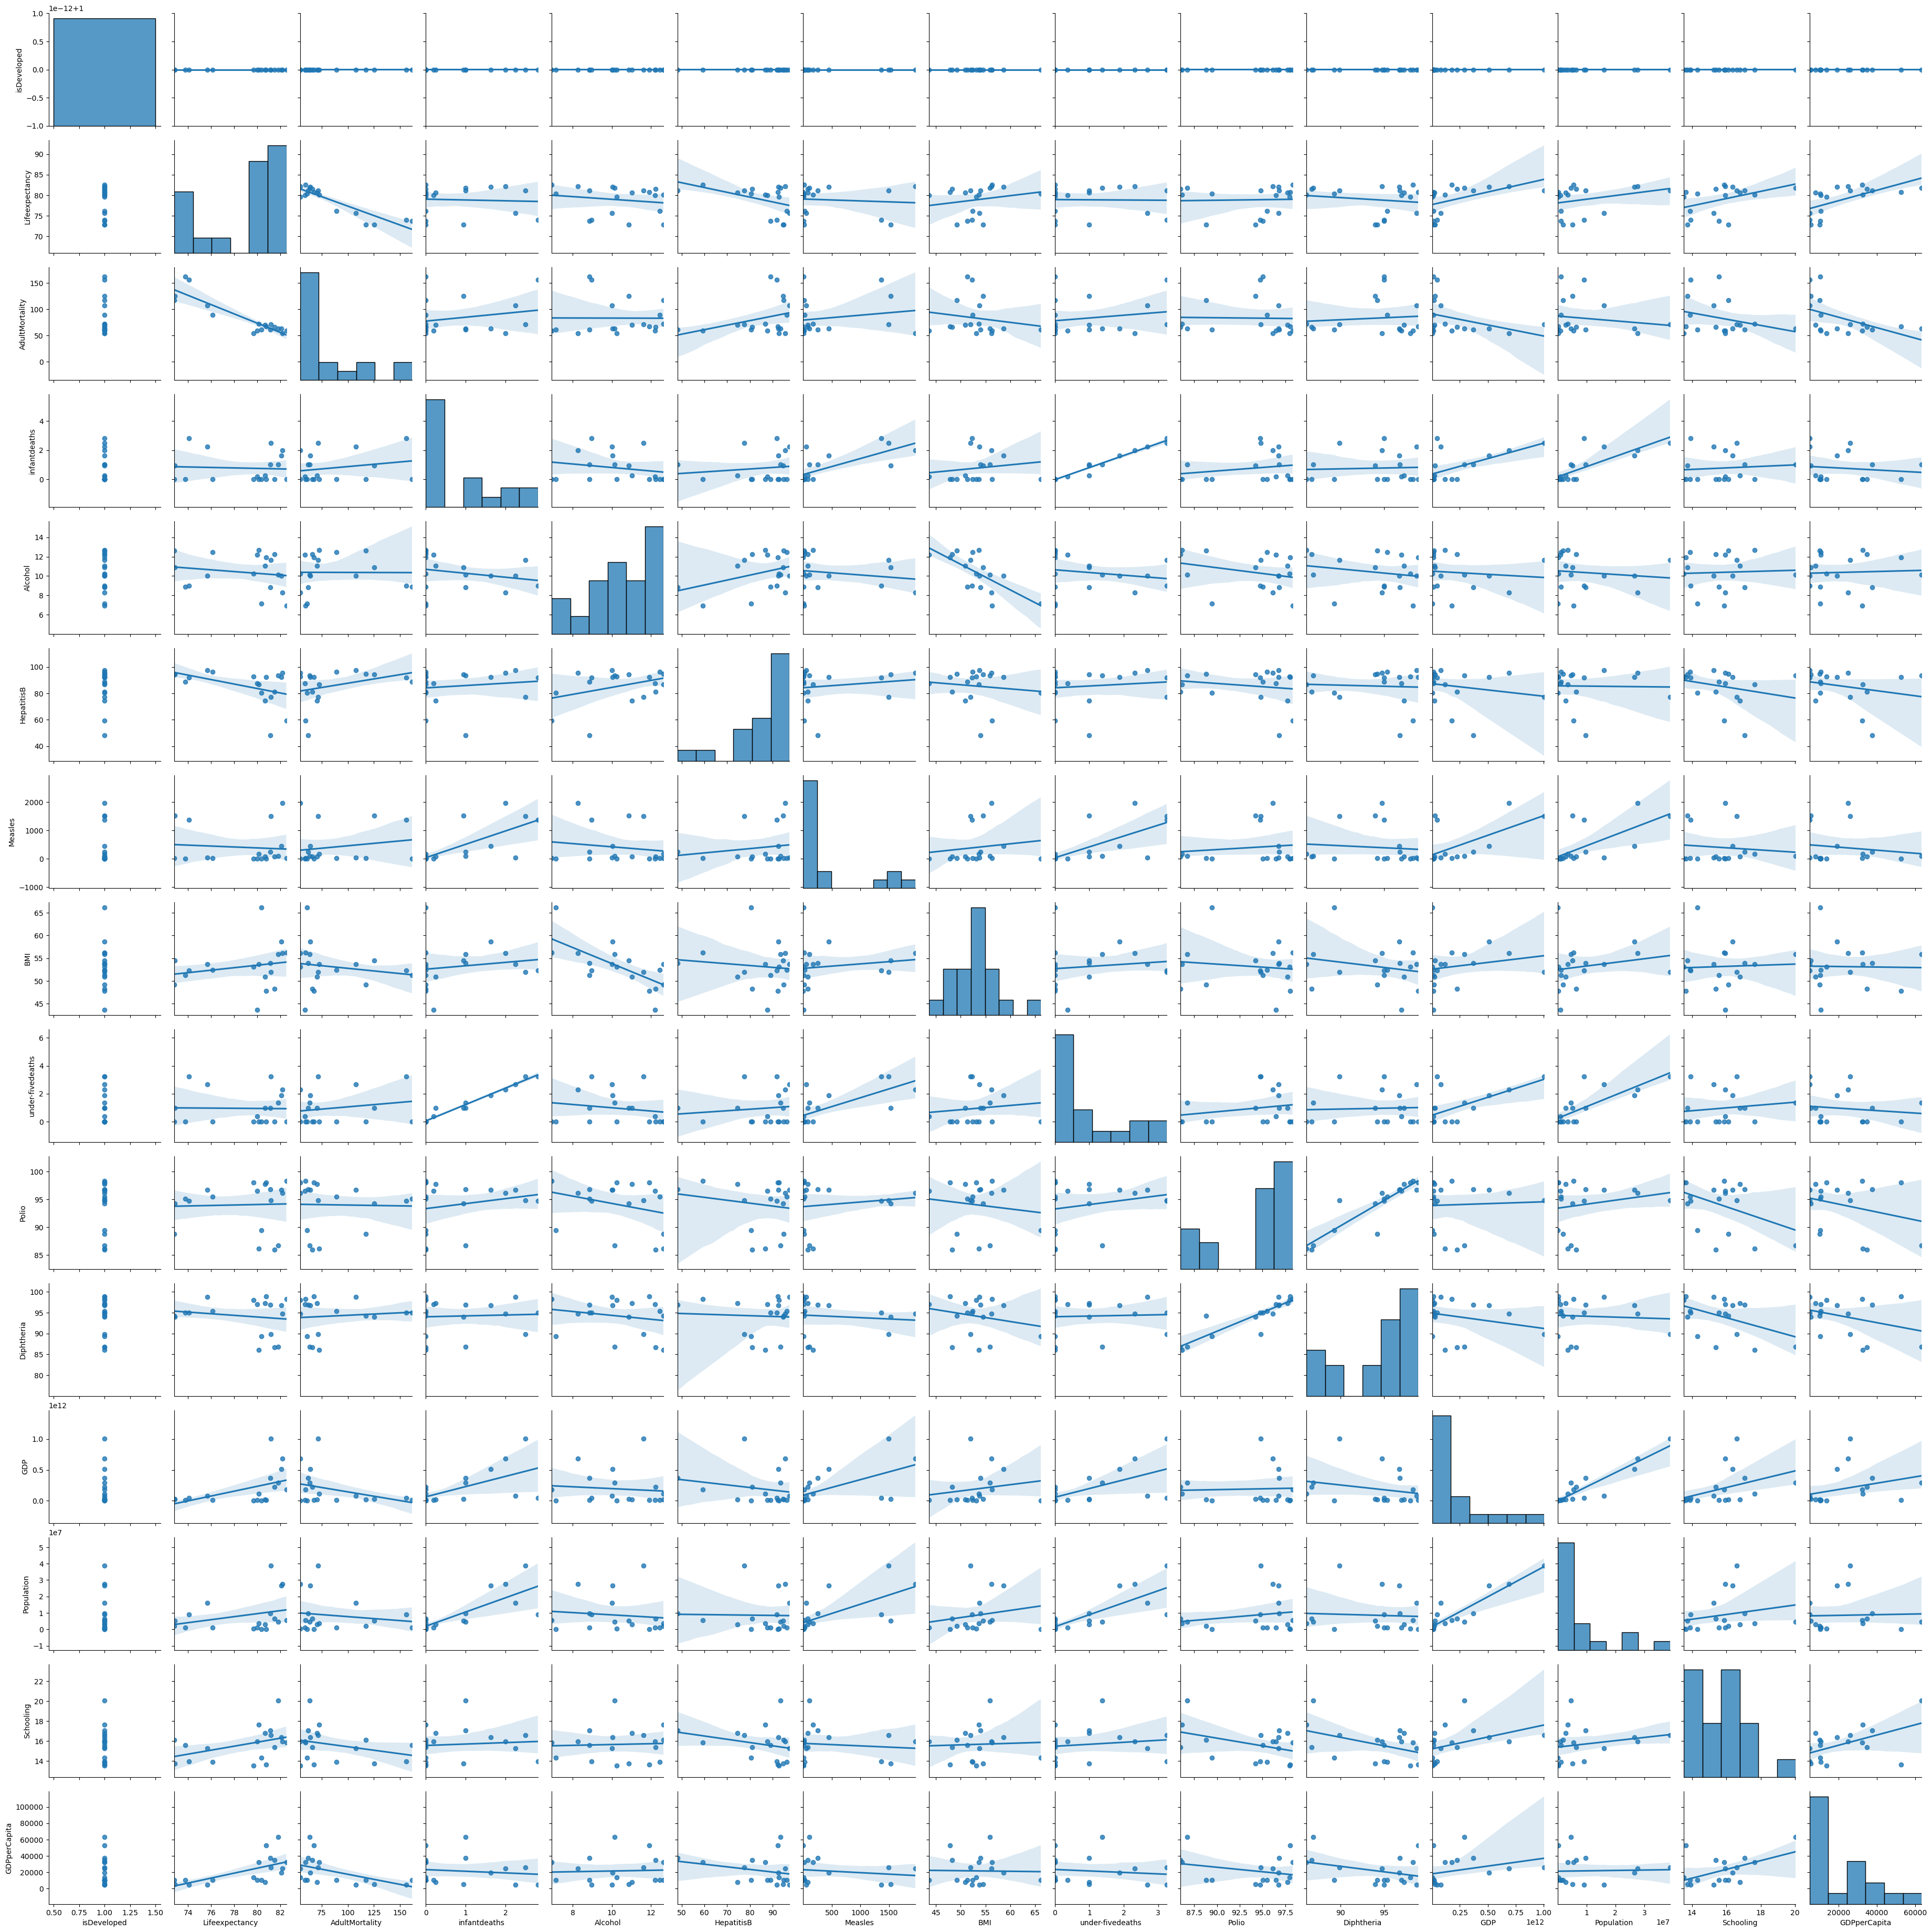

In [31]:
#Calculate correlations and analyze. 
#Get data first
developed=dfLE[dfLE['isDeveloped']==1]
notdeveloped=dfLE[dfLE['isDeveloped']==0]

sns.pairplot(developed,dropna=True, kind='reg')
plt.show()

# By looking for correlations visually I think the 3 strontest correlation in developed country countries are:
<li>Life expectancy vs Adult mortality
<li>Life expectancy vs GDP per Capita 
<li>life expectancy vs Schooling

In [41]:
#Calculate the correlation for developed countries

a=developed['Lifeexpectancy'].values.tolist()
b=developed['GDPperCapita'].values.tolist()
c=developed['AdultMortality'].values.tolist()
d=developed['Schooling'].values.tolist()
e=developed['Polio'].values.tolist()
print('the correlation between Life expectancy and GDP per Capita is:',thinkstats2.Corr(a,b))
print('the correlation between Life expectancy and Adult mortality is:',thinkstats2.Corr(a,c))
print('the correlation between Life expectancy and Schooling is:',thinkstats2.Corr(a,d))
print('the correlation between Life expectancy and Polio is:',thinkstats2.Corr(a,e))

the correlation between Life expectancy and GDP per Capita is: 0.6204988062972088
the correlation between Life expectancy and Adult mortality is: -0.8993592069981188
the correlation between Life expectancy and Schooling is: 0.4181049646922839
the correlation between Life expectancy and Polio is: 0.03449852320843403


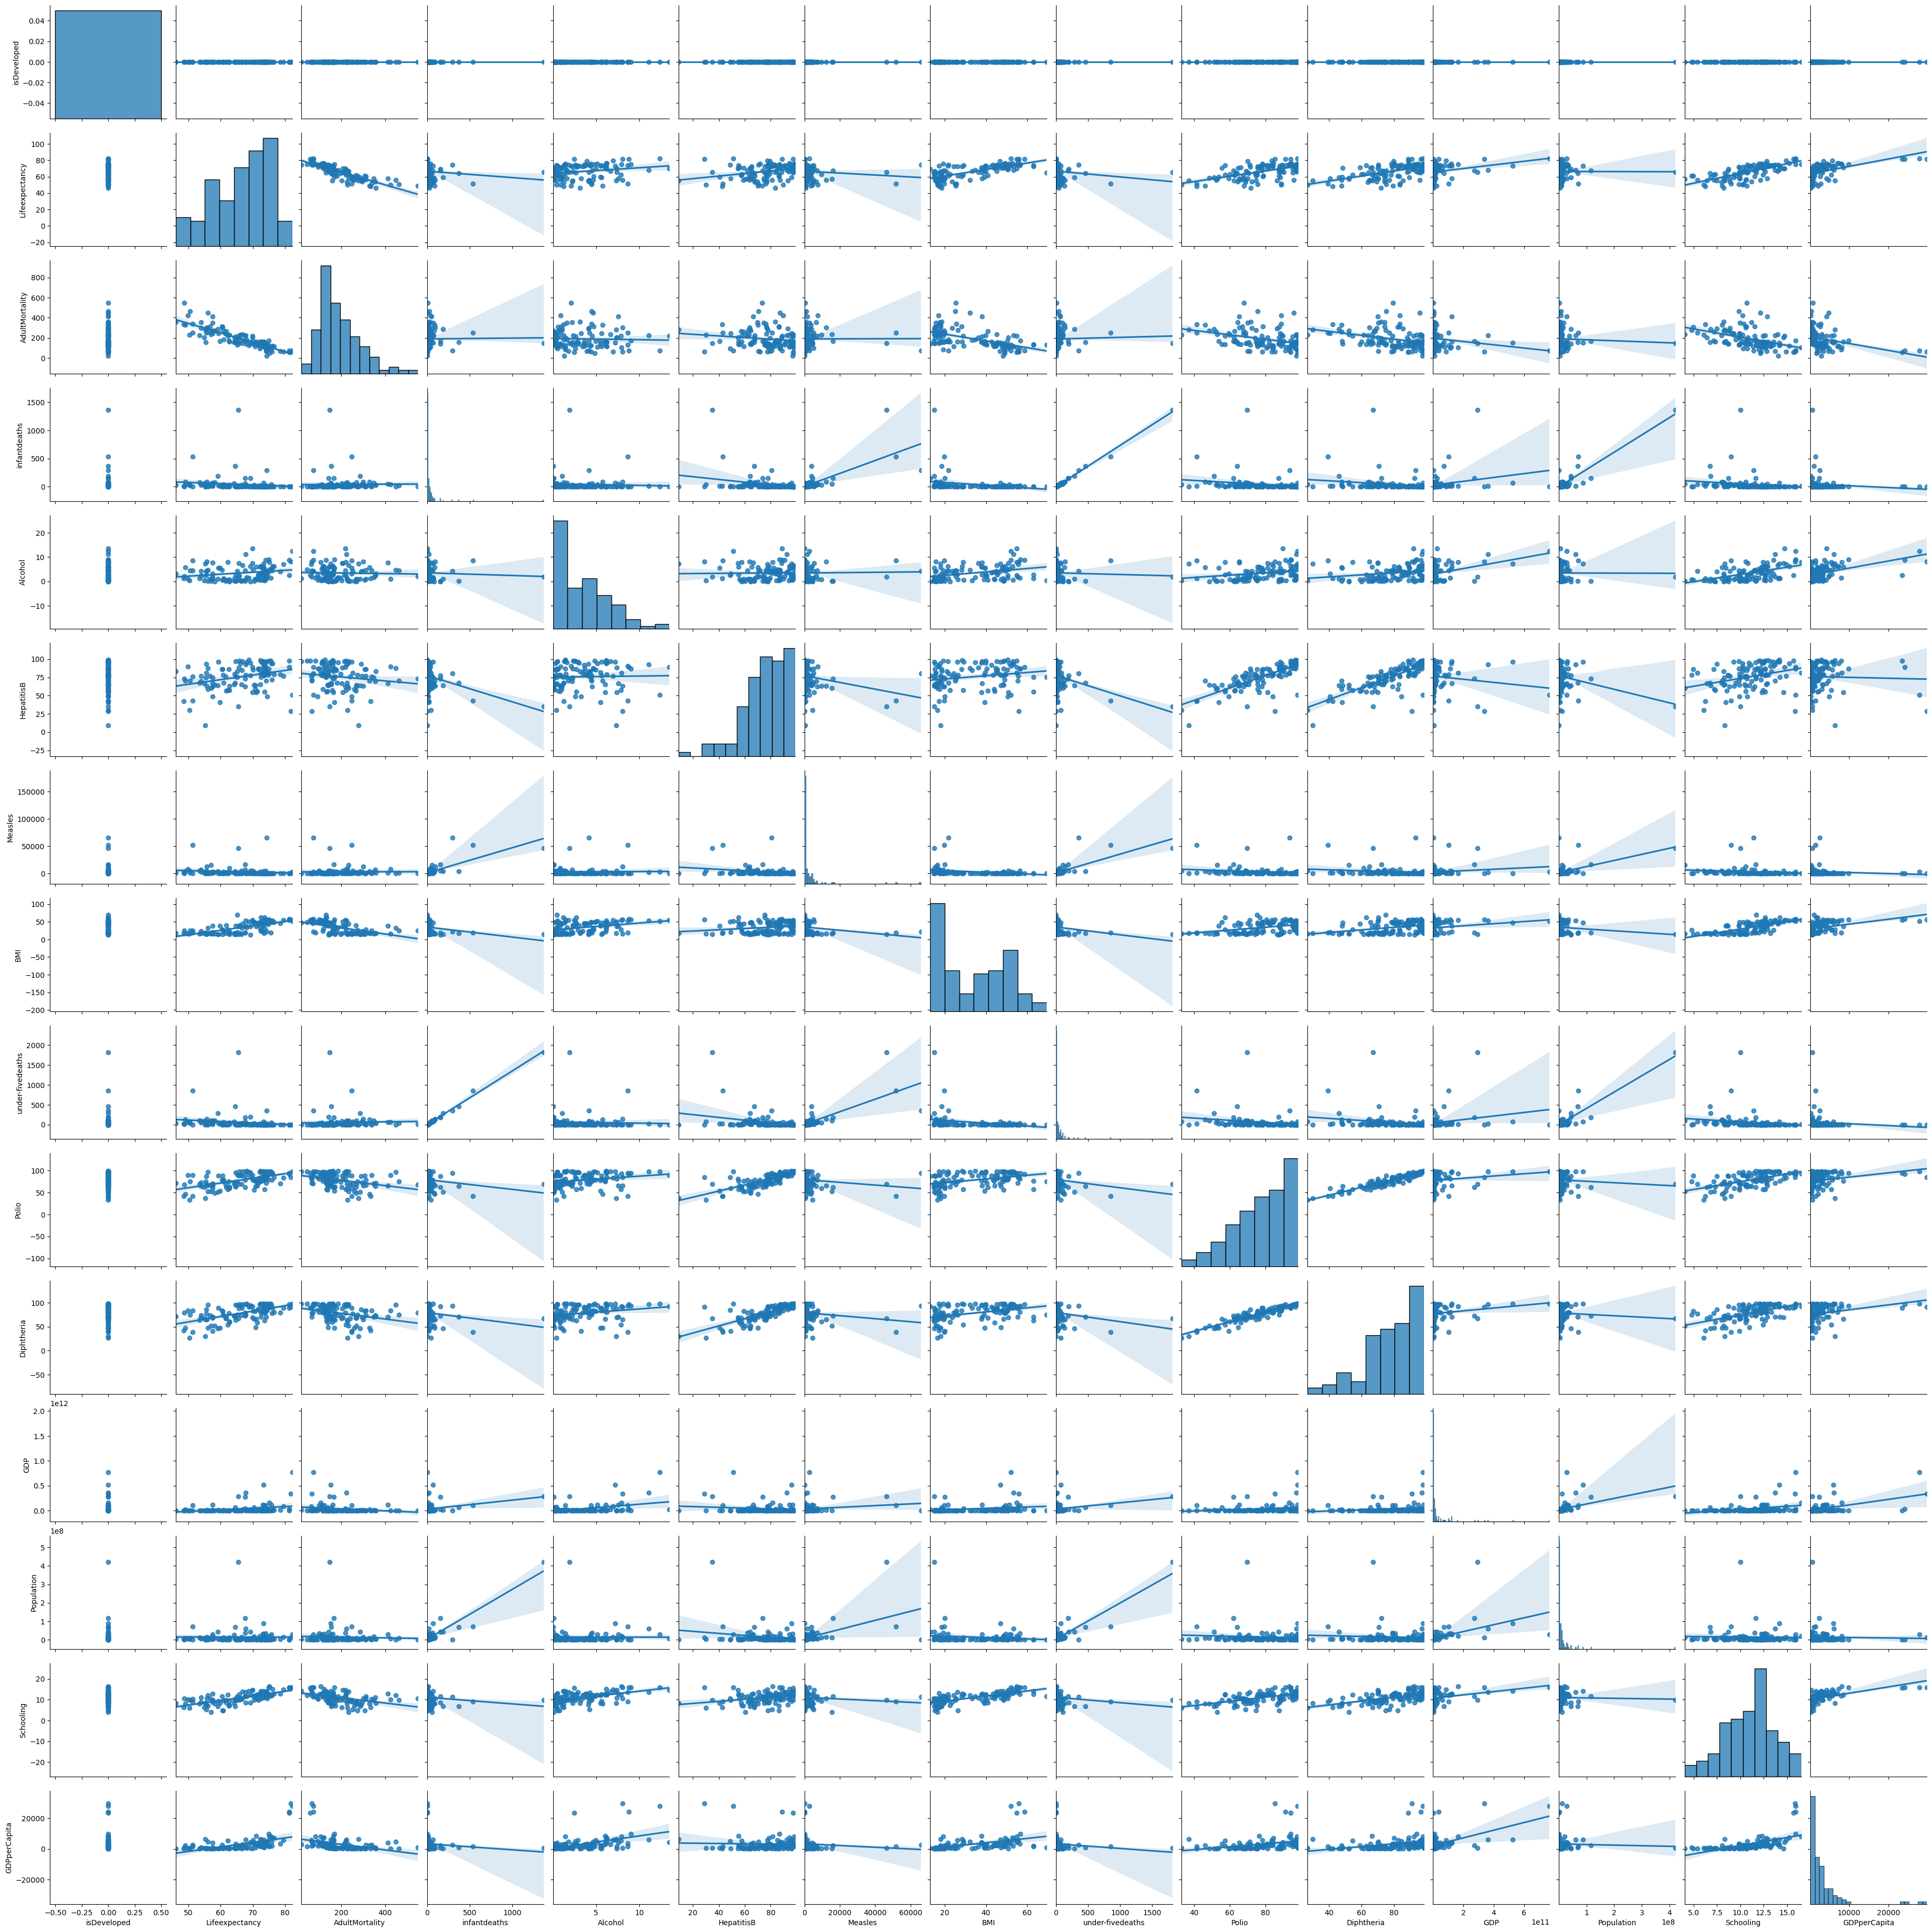

In [34]:
# Analyzing the correlation for not developed countries

sns.pairplot(notdeveloped,dropna=True, kind='reg')
plt.show()

# By looking for correlations visually I think the 3 strontest correlation in not developed country countries are:
<li>Life expectancy vs Adult mortality
<li>Life expectancy vs GDP per Capita 
<li>life expectancy vs Schooling

In [42]:
#Calculate the correlation for not developed countries

a=notdeveloped['Lifeexpectancy'].values.tolist()
b=notdeveloped['GDPperCapita'].values.tolist()
c=notdeveloped['AdultMortality'].values.tolist()
d=notdeveloped['Schooling'].values.tolist()
e=notdeveloped['Polio'].values.tolist()
print('the correlation between Life expectancy and GDP per Capita is:',thinkstats2.Corr(a,b))
print('the correlation between Life expectancy and Adult mortality is:',thinkstats2.Corr(a,c))
print('the correlation between Life expectancy and Schooling is:',thinkstats2.Corr(a,d))
print('the correlation between Life expectancy and Polio is:',thinkstats2.Corr(a,e))

the correlation between Life expectancy and GDP per Capita is: 0.5163819072103433
the correlation between Life expectancy and Adult mortality is: -0.8548011808892686
the correlation between Life expectancy and Schooling is: 0.7237464222789846
the correlation between Life expectancy and Polio is: 0.5850204642699731


I think the correlation between life expectancy and GDP per Caoita is reasonable,because in most cases as people age, they will have more knowledge and skills help them to get higher salary which could make the GDP per Capita increase.Similar to the correlation between life expectancy and schooling. For people in a country with longer life expectancy they will have more chance to get more education. 


I found in developed countries the correlation between life expectancy and Polio is very low which is only about 0.034. However in not developed countries the correlation is about 0.585. After I did some search I found Polio is a highly contagious vaccine-preventable disease. It is most common in infants and yong children, but adults who are not fully immunized can also get polio. 
In developed infant or childeren may already got the vaccine. However in some not developed countries infant or children may not have the chance to get the vaccine and they could have more adults who not fully immunized.

The other thing I found is the correlation between life expectancy and schooling in developed countries and not developed countries. For developed countries the correlation is about 0.418 and for not developed countries the correlation is about 0.724. Based on the pairplot for the developed and not developed countries, I found in not developed countries the correlation between schooling and GDP per capita tends to have stronger correlation compare to the correlation in developed countries. In not developed countries as the schooling increase the GDP per capita also increase which means for people with better education tends to be in a better financial state which could help them to have more chance to pay attentation on the health care. 